In [43]:
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

In [44]:
i = 99
Tf = np.genfromtxt('out/output_' + str(i) + '.csv')
Tf = Tf.transpose()

X = np.arange(Tf.shape[1])
Y = np.arange(Tf.shape[0])

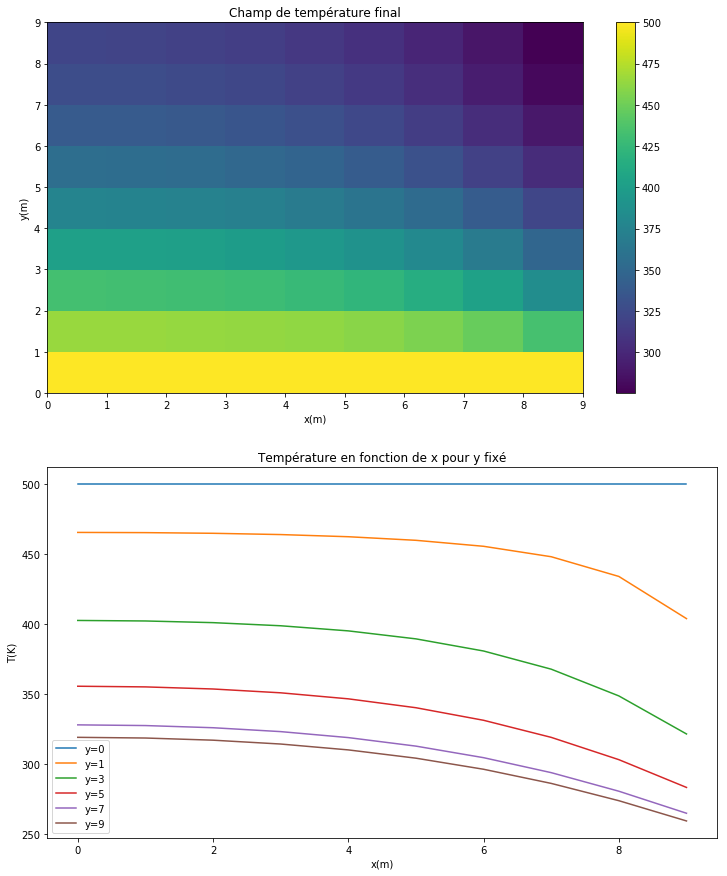

In [45]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,15))

ax1.pcolormesh(X,Y,Tf)
ax1.set_title("Champ de température final")
fig.colorbar(im, ax=ax1)
ax1.set_xlabel("x(m)")
ax1.set_ylabel("y(m)")

yfix = [0,1,3,5,7,9]
for y in yfix:
    ax2.plot(X,Tf[y,:], label='y={}'.format(y))
ax2.set_title("Température en fonction de x pour y fixé")
ax2.set_xlabel("x(m)")
ax2.set_ylabel("T(K)")
ax2.legend()